In [1]:
import copy
import warnings

import numpy as np
import xarray as xr

import sys, pdb, traceback

import matplotlib.pyplot as plt

import rotunno as rt
import qian_helpers
import rotunno_helpers

In [2]:
from sympy import *

In [10]:
init_printing()

In [4]:
theta, U, L, xi, tau, k_2, k_3 = symbols('theta U L xi tau k_2 k_3')
k2 = (1-sin(theta))/U 
k3 = (1/(1-sin(theta)))/U

C2 = exp(-k2*L)*exp(1j*(k2*xi-tau))/(k2**2+(k2/U-1)**2)
C3 = exp(-k3*L)*exp(1j*(k3*xi-tau))/(k3**2+(k3/U-1)**2)*k3**2

expression = (C3-C2/U**2)/tan(theta)

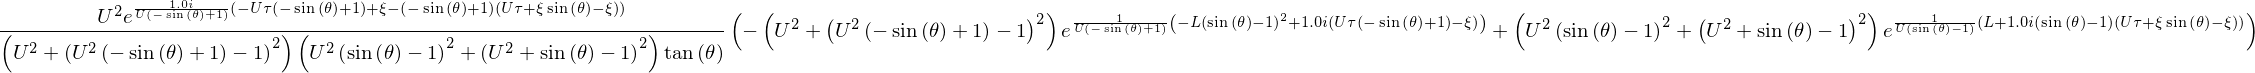

In [11]:
simplify(expression)

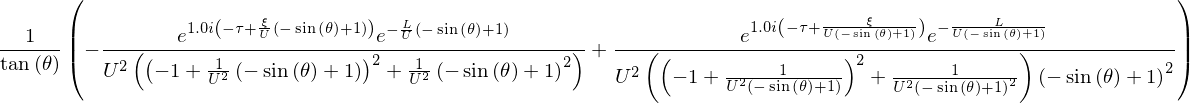

In [12]:
expression

In [2]:
# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport rotunno 

In [2]:
ds = xr.open_dataset('/home/student.unimelb.edu.au/shorte1/Documents/rotunno83/datasets/qian_20191121_081203.nc')

In [2]:
ds_qian = rt.solve_qian(xiN=41, zetaN=21, tauN=16, sN=1000, U=0.5, L=0.1, alpha=3, save=False)
# ds_rotunno = rt.solve_rotunno_case_two(xiN=81, zetaN=41, tauN=16, kN=1000,
#                                        xi0=0.2, beta=0.007195175718401071)

Initialising
Integrating
100%|██████████| 20/20 [00:54<00:00,  2.74s/it]
Saving


In [84]:
tt = np.arange(3, dtype=np.float32)
tt

array([0., 1., 2.], dtype=float32)

/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: ComplexWarning: Cas

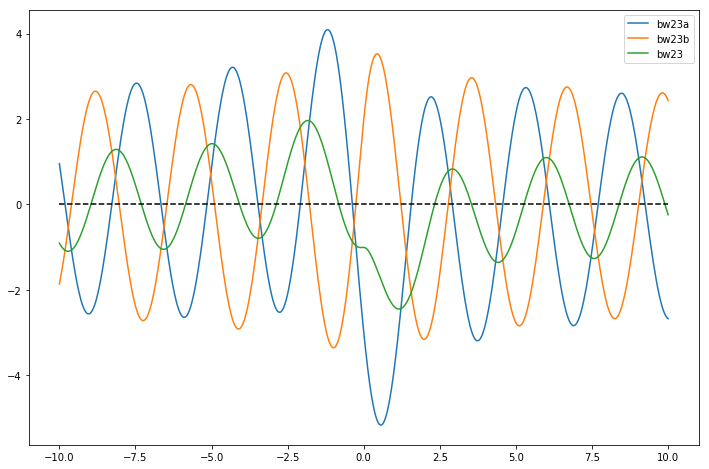

In [150]:
plt.close('all')
power=6
tau=1
zeta=0.1
alpha=1
U=.5
L=0.1
sN=1000
dS=1/sN

s=np.arange(dS,1,dS,dtype=np.float32)
xi=np.linspace(-10,10,1000)
theta=qian_helpers.calc_theta(s,alpha)

k2 = qian_helpers.calc_k_2(theta,U)
k3 = qian_helpers.calc_k_3(theta,U)
k0_2 = qian_helpers.calc_k_2(0,U)
k0_3 = qian_helpers.calc_k_3(0,U)
bw23=np.zeros(xi.size)
bw23_alt=np.zeros(xi.size)
bw23a=np.zeros(xi.size)
bw23b=np.zeros(xi.size)
bw2b=np.zeros(xi.size)
bw2c=np.zeros(xi.size)
bw3b=np.zeros(xi.size)
bw3c=np.zeros(xi.size)

# def calc_k_2()

def calc_test(xi,zeta,tau,theta,U,L):
    test_exp = (
        U**2*(-(U**2 + (U**2*(-np.sin(theta) + 1) - 1)**2)
              *np.exp((-L*(np.sin(theta) - 1)**2 + 1j*(U*tau*(-np.sin(theta) + 1) - xi))/(U*(-np.sin(theta) + 1)))
              +(U**2*(np.sin(theta) - 1)**2 + (U**2 + np.sin(theta) - 1)**2)
              *np.exp((L + 1j*(np.sin(theta) - 1)*(U*tau + xi*np.sin(theta) - xi))/(U*(np.sin(theta) - 1))))
        *np.exp(1j*(-U*tau*(-np.sin(theta) + 1) + xi - (-np.sin(theta) + 1)*(U*tau + xi*np.sin(theta) - xi))/(U*(-np.sin(theta) + 1)))
        /((U**2 + (U**2*(-np.sin(theta) + 1) - 1)**2)
          *(U**2*(np.sin(theta) - 1)**2 + (U**2 + np.sin(theta) - 1)**2)
          *np.tan(theta))
    )
    return test_exp

for i in range(xi.size):
    bw23_iga = (1/np.tan(theta)
               *(
                 -qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2
#                  +qian_helpers.calc_C3(xi[i],tau,k3,U,L)
                )
               *alpha*s**(alpha-1)*np.pi/2)
    bw23_igb = (1/np.tan(theta)
               *(
#                  -qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2
                 +qian_helpers.calc_C3(xi[i],tau,k3,U,L)
                )
               *alpha*s**(alpha-1)*np.pi/2)
    bw23_ig = (1/np.tan(theta)
                *(
                  -qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2
                  +qian_helpers.calc_C3(xi[i],tau,k3,U,L)
                 )
                *alpha*s**(alpha-1)*np.pi/2)
    
    bw23_ig_alt = calc_test(xi[i],zeta,tau,theta,U,L)*alpha*s**(alpha-1)*np.pi/2
    
    bw23a[i] = np.trapz(bw23_iga,s)*1/2*np.exp(-zeta)
    bw23b[i] = np.trapz(bw23_igb,s)*1/2*np.exp(-zeta)
    bw23[i] = np.trapz(bw23_ig,s)*1/2*np.exp(-zeta)
    bw23_alt[i] = np.trapz(bw23_ig_alt,s)*1/2*np.exp(-zeta)
    bw2c[i] = (1/(2*U**2)*np.exp(1j*zeta/U)
               *qian_helpers.calc_C2(xi[i],tau,k0_2,U,L)
               *qian_helpers.calc_exp1(1j*zeta/U))
    bw2b[i] = np.trapz(qian_helpers.calc_bw2b(xi[i],zeta,tau,s,alpha,U,L),s)
    bw3b[i] = np.trapz(qian_helpers.calc_bw3b(xi[i],zeta,tau,s,alpha,U,L),s)
    bw3c[i] = (-1/2*qian_helpers.calc_C3(xi[i],tau,k0_3,U,L)
                        *qian_helpers.calc_exp1(-1j*zeta/U))
    
# plt.figure(figsize=(12,8))
# plt.plot(xi,bw23a,label='bw23a')
# plt.plot(xi,bw23b,label='bw23b')
# plt.plot(xi,bw23_alt,label='bw23')
# plt.plot(xi,np.zeros(xi.size),'--k')
# plt.plot(xi,bw2b,label='bw2b')
# plt.plot(xi,bw2c,label='bw2c')
# plt.plot(xi,bw3b,label='bw3b')
# plt.plot(xi,bw3c,label='bw3c')
# plt.plot(s,k2,'.')
# plt.plot(s[0:4000],k3[0:4000]-1.25,'.')

# plt.figure(figsize=(12,8))
# plt.plot(s[0:800],k3[0:800],'.')

# plt.legend()
# plt.show()
plt.figure(figsize=(12,8))

# plt.plot(xi,bw3b+bw3c,label='bw3b+bw3c')
# plt.plot(xi,bw2b+bw2c+bw23,label='bw2b+bw2c+bw23_alt')
# plt.plot(xi,bw23_alt,label='bw23_alt')
plt.plot(xi,bw23a,label='bw23a')
plt.plot(xi,bw23b,label='bw23b')
plt.plot(xi,bw23,label='bw23')
# plt.plot(xi,bw23a+bw23b,label='bw23a+bw23b')
# plt.plot(xi,bw23,label='bw23')
plt.plot(xi,np.zeros(xi.size),'--k')
plt.legend()
plt.show()

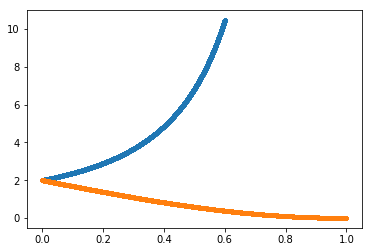

In [162]:
plt.plot(s[0:30000],k3[0:30000],'.')
plt.plot(s,k2,'.')

In [82]:
def calc_theta_alt(s):
    theta_alt = (1-np.cos(s*np.pi))*np.pi/4
    return theta_alt

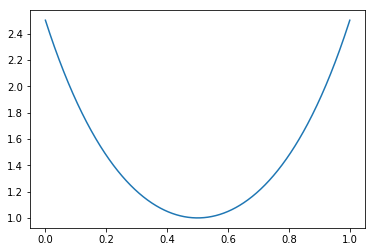

In [114]:
# plt.plot(s,theta_alt)
# plt.plot(s,theta)
plt.plot(s,np.cosh((s-0.5)*np.pi)**1)

/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


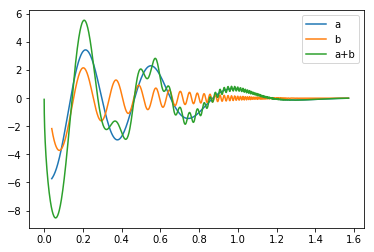

In [100]:
x=-20
alpha=3
U=1
L=0.1
sN=1000
dS=1/sN

s=np.arange(dS,1,dS,dtype=np.float32)
theta=calc_theta_alt(s)

k2 = qian_helpers.calc_k_2(theta,U)
k3 = qian_helpers.calc_k_3(theta,U)
k0_2 = qian_helpers.calc_k_2(0,U)
k0_3 = qian_helpers.calc_k_3(0,U)

# bw23a_ig = (1/np.tan(theta)
#                *(
#                  -qian_helpers.calc_C2(x,tau,k2,U,L)/U**2
# #                  +qian_helpers.calc_C3(xi[i],tau,k3,U,L)
#                 )
#                *alpha*s**(alpha-1)*np.pi/2)
# bw23b_ig = (1/np.tan(theta)
#            *(
# #                  -qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2
#              +qian_helpers.calc_C3(x,tau,k3,U,L)
#             )
#            *alpha*s**(alpha-1)*np.pi/2)

bw23a_ig = (1/np.tan(theta)
               *(
                 -qian_helpers.calc_C2(x,tau,k2,U,L)/U**2
#                  +qian_helpers.calc_C3(xi[i],tau,k3,U,L)
                )
               *np.sin(s*np.pi)*np.pi/4)
bw23b_ig = (1/np.tan(theta)
           *(
#                  -qian_helpers.calc_C2(xi[i],tau,k2,U,L)/U**2
             +qian_helpers.calc_C3(x,tau,k3,U,L)
            )
           *np.sin(s*np.pi)*np.pi/4)

plt.plot(theta[100:],bw23a_ig[100:],label='a')
plt.plot(theta[100:],bw23b_ig[100:],label='b')
plt.plot(theta,(bw23b_ig+bw23a_ig),label='a+b')
plt.legend()


In [106]:
ig=(bw23b_ig+bw23a_ig)
ig[np.isnan(bw23b_ig+bw23a_ig)]=0
np.trapz(ig,s)

(-0.8360863131183129-0.360964628529348j)

(0.35736927156052356+0.639392571768856j)
(0.5022095881000948+0.521705376655576j)
(0.613298983485386+0.3733400858443321j)
(0.6843824628974678+0.20371579543362425j)


/home/student.unimelb.edu.au/shorte1/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


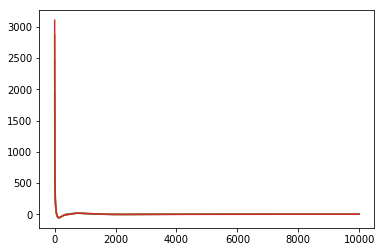

In [179]:
bw23_ig_alt_1 = calc_test(-10.00,zeta,6*2*np.pi/10,theta,U,L)*alpha*s**(alpha-1)*np.pi/2
bw23_ig_alt_2 = calc_test(-10.20,zeta,6*2*np.pi/10,theta,U,L)*alpha*s**(alpha-1)*np.pi/2
bw23_ig_alt_3 = calc_test(-10.40,zeta,6*2*np.pi/10,theta,U,L)*alpha*s**(alpha-1)*np.pi/2
bw23_ig_alt_4 = calc_test(-10.60,zeta,6*2*np.pi/10,theta,U,L)*alpha*s**(alpha-1)*np.pi/2

plt.plot(bw23_ig_alt_1)
print(np.trapz(bw23_ig_alt_1,s)*1/2*np.exp(-zeta))
plt.plot(bw23_ig_alt_2)
print(np.trapz(bw23_ig_alt_2,s)*1/2*np.exp(-zeta))
plt.plot(bw23_ig_alt_3)
print(np.trapz(bw23_ig_alt_3,s)*1/2*np.exp(-zeta))
plt.plot(bw23_ig_alt_4)
print(np.trapz(bw23_ig_alt_4,s)*1/2*np.exp(-zeta))

In [157]:
k3[8000]

8.036649021604719

In [149]:
len(k2)

9999

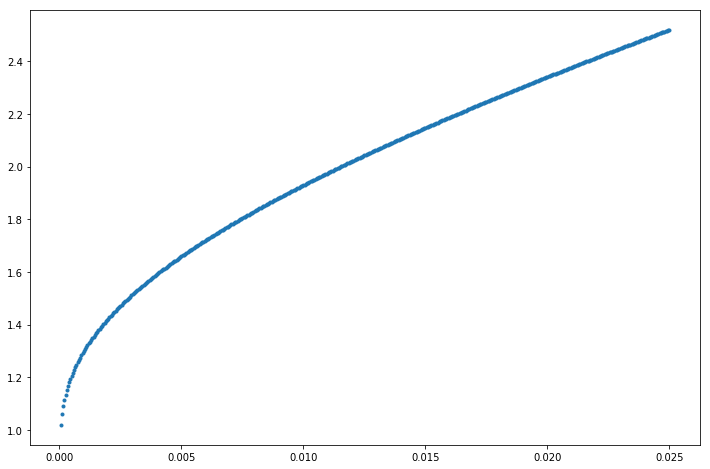

In [61]:
plt.figure(figsize=(12,8))
plt.plot(s[0:500],k3[0:500],'.')

In [3]:
omega = 2*np.pi/(24*3600)
# ds_rotunno_dim = rt.redimensionalise_rotunno(copy.deepcopy(ds_rotunno), h=5000, f=0, N=0.035)
ds_qian_dim = rt.redimensionalise_qian(copy.deepcopy(ds_qian), h=1500, N=0.01, Q0=10**3*omega**3*1500*np.pi)

In [6]:
# rt.animateCont(ds_qian_dim.sum(dim='mode', keep_attrs=True).squeeze(),var='psi')
# rt.animatePsi(ds_dim.sel(mode=2).squeeze())
# rt.animateCont(ds_qian_dim.sel(mode=[2,3]).sum(dim='mode', keep_attrs=True).squeeze(),  var='bw')
# rt.animateCont(ds_qian_dim.sel(mode=[2,3]).sum(dim='mode', keep_attrs=True).squeeze(),  var='w')
# for i in np.arange(1,7):
#     rt.animateCont(ds_qian_dim.sel(submode=i),  var='bw')
rt.animateCont(ds_qian_dim.sel(submode=[2]).sum(dim='submode', keep_attrs=True).squeeze(),'bw')
# rt.animateCont(ds_qian_dim.sel(mode=2).squeeze(),  var='psi')

Plotting bw.
Timestep 0
Timestep 0
Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7
Timestep 8
Timestep 9
Timestep 10
Timestep 11
Timestep 12
Timestep 13
Timestep 14
Timestep 15


Plotting w.


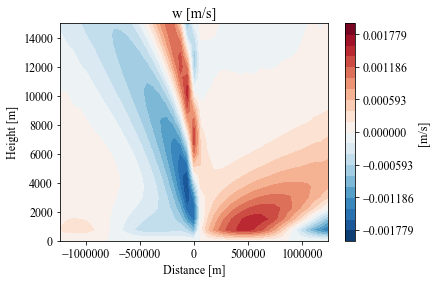

In [22]:
rt.plotCont(ds_qian_dim.sel(mode=[1,2]).sum(dim='mode', keep_attrs=True).squeeze(), t=5, var='w'); plt.show()

In [51]:
ds_qian_dim['theta_pert'] = ds_qian_dim.bw*300/9.807
ds_qian_dim.theta_pert.attrs['units'] = 'K'

Plotting bw.


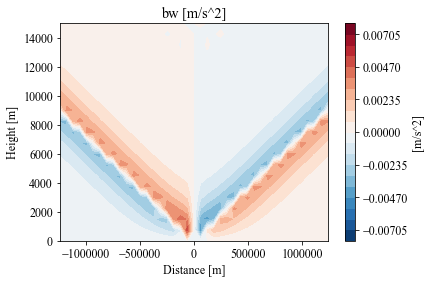

In [12]:
rt.plotCont(ds_qian_dim.sel(mode=[1,2]).sum(dim='mode', keep_attrs=True).squeeze(), t=8, var='bw'); plt.show()

Plotting w.


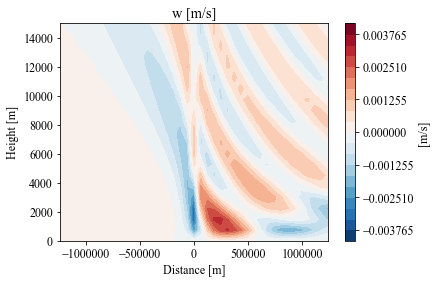

In [23]:
# plt.close('all'); rt.plotCont(ds_qian_dim.sel(mode=2).squeeze(), t=7, var='bw'); plt.show()
rt.plotCont(ds_qian_dim.sel(mode=[1,2,3]).sum(dim='mode', keep_attrs=True).squeeze(), t=1, var='w'); plt.show()

In [14]:
ds_qian_dim['bw'].sel(submode=1)


<xarray.DataArray 'bw' (tau: 32, zeta: 21, xi: 41)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 1.958886e-05,  1.978248e-05, ...,  2.110002e-05,  1.966475e-05],
        ...,
        [-3.019598e-04, -3.295311e-04, ...,  1.731370e-05,  1.723720e-05],
        [-3.230871e-04, -3.459937e-04, ...,  1.616347e-05,  1.623230e-05]],

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 1.253797e-05,  1.192640e-05, ...,  2.412829e-05,  2.243550e-05],
        ...,
        [-3.095749e-04, -3.302517e-04, ...,  1.755676e-05,  1.752399e-05],
        [-3.222571e-04, -3.369935e-04, ...,  1.638255e-05,  1.643084e-05]],

       ...,

       [[ 0.000000e+00,  0.000000e+00, ...,  0.000000e+00,  0.000000e+00],
        [ 3.119024e-05,  3.294125e-05, ...,  1.275841e-05,  1.199163e-05],
        ...,
        [-2.526559e-04, -2.906132e-04, ...,  1.486644e-05,  1.471285e-05],
        [-2.879442e-04, -3.242702e-04, ...,  1.389414e-05,  1.39954

In [3]:
rt.animateCont(ds_qian_dim.sel(mode=3).squeeze(),  var='bw')

NameError: name 'ds_qian_dim' is not defined

In [19]:
# rt.animateVelocity(ds.sum(dim='mode', keep_attrs=True).squeeze())
# rt.animateVelocity(ds_rotunno_dim)
# rt.animateVelocity(ds_qian_dim.sum(dim='mode', keep_attrs=True).squeeze())
rt.animateVelocity(ds_qian_dim.sel(mode=2).squeeze())

Plotting velocity.
Timestep 0
Timestep 0
Timestep 1
Timestep 2
Timestep 3
Timestep 4
Timestep 5
Timestep 6
Timestep 7


In [ ]:
rt.plotVelocity(ds_qian_dim.sum(dim='mode', keep_attrs=True).squeeze(), t=3); plt.show()